<a href="https://colab.research.google.com/github/Hwang-Jonghyeon/S1-pj/blob/main/AI_07_%ED%99%A9%EC%A2%85%ED%98%84_S1pj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [125]:
df = pd.read_csv('/content/vgames2.csv',encoding = 'utf-8')
df.isnull().sum()

df=df.dropna()

In [126]:
df = df.loc[:,['Year','Platform','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']].astype({'Year': int})

df['Year'] = df['Year'].apply(lambda x:x+2000 if x<= 21 else x)
df['Year'] = df['Year'].apply(lambda x:x+1900 if 22 < x<= 99 else x)
#연도 값 변경

df = df[(df['Year'] >= 2000)&(df['Year'] < 2017)].sort_values(by='Year',ascending= False)
#df['Year'].value_counts()

In [127]:
df = df[~df.NA_Sales.str.contains('K')]
df = df[~df.EU_Sales.str.contains('K')]
df = df[~df.JP_Sales.str.contains('K')]
df = df[~df.Other_Sales.str.contains('K')]
#단위 K(1000)가 포함된 행 제거
df['NA_Sales'] = df['NA_Sales'].str.replace('M','')
df['EU_Sales'] = df['EU_Sales'].str.replace('M','')
df['JP_Sales'] = df['JP_Sales'].str.replace('M','')
df['Other_Sales'] = df['Other_Sales'].str.replace('M','')
#단위 통일

In [128]:
df = df.astype({'NA_Sales': np.float,
                'EU_Sales': np.float,
                'JP_Sales': np.float,
                'Other_Sales': np.float})

df['all_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
#데이터 1차 전처리
df

,Year,Platform,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,all_Sales
13024,2016,PS3,Sports,0.00,0.04,0.00,0.01,0.05
1645,2016,PSV,Action,0.00,0.00,0.02,0.00,0.02
2795,2016,X360,Shooter,0.01,0.01,0.00,0.00,0.02
14331,2016,PS3,Role-Playing,0.00,0.00,0.12,0.00,0.12
15944,2016,PSV,Role-Playing,0.00,0.00,0.05,0.00,0.05
...,...,...,...,...,...,...,...,...
831,2000,PS,Racing,0.07,0.04,0.00,0.01,0.12
4387,2000,PS,Sports,0.09,0.06,0.00,0.01,0.16
8501,2000,N64,Sports,0.34,0.07,0.00,0.00,0.41
12925,2000,DC,Role-Playing,0.00,0.00,0.20,0.00,0.20


In [130]:
game_df = df.loc[:,['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

game_df_group = game_df.groupby(['Year','Genre']).sum().sort_values(by='Year',ascending= False)
game_df_group
#2000년 이후 연도별/장르 총 판매량

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Year Genre                                                
2016 Strategy        0.11      0.32      0.05         0.04
     Racing          0.33      1.14      0.01         0.19
     Action          5.87      6.36      5.77         1.83
     Adventure       0.34      0.37      0.95         0.11
     Fighting        1.60      1.15      0.64         0.46
...                   ...       ...       ...          ...
2000 Shooter         4.00      2.17      0.20         0.46
     Simulation      1.11      0.77      1.27         0.22
     Sports         22.15      9.74      6.18         2.35
     Strategy        3.20      1.02      3.78         0.52
     Action         17.72     10.82      3.74         1.61

[203 rows x 4 columns]

In [131]:
game_df2 = df.loc[:,['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','all_Sales']]

game_group2_df = game_df2.groupby(['Genre']).sum().sort_values(by=['all_Sales'],ascending= False).reset_index()

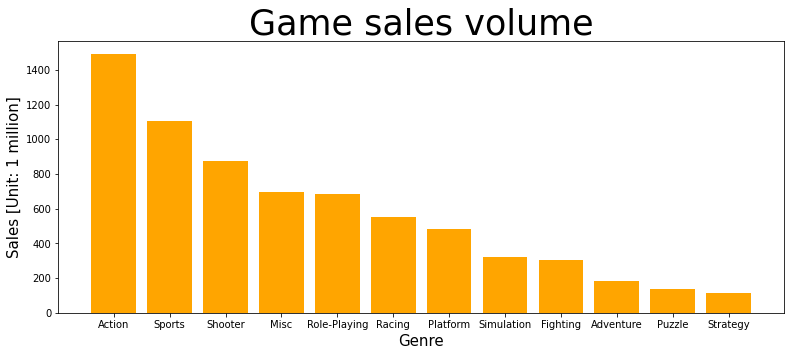

In [132]:
#2000년 이후 전체 게임 판매량 장르별 순위
bar_plot = game_group2_df.loc[:,['Genre','all_Sales']]
fig = plt.figure(figsize=(13,5))

parameters = {'axes.titlesize': 35,
              'axes.labelsize': 15
              }
plt.rcParams.update(parameters)

plt.title('Game sales volume')
plt.xlabel('Genre')
plt.ylabel('Sales [Unit: 1 million]')

plt.bar(bar_plot['Genre'],
        bar_plot['all_Sales'],
        color={'orange'})

plt.show()

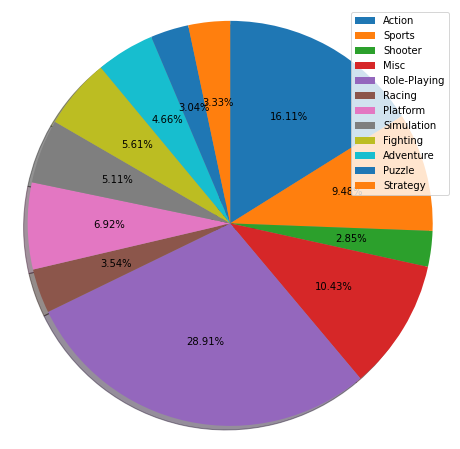

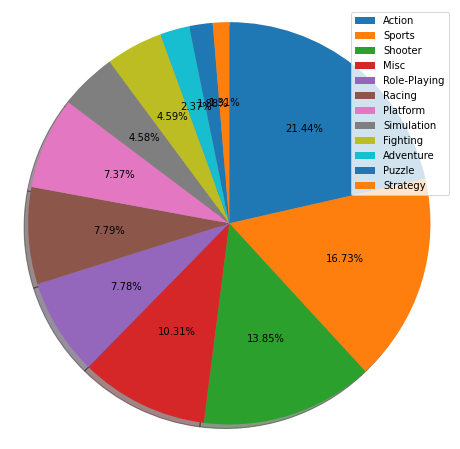

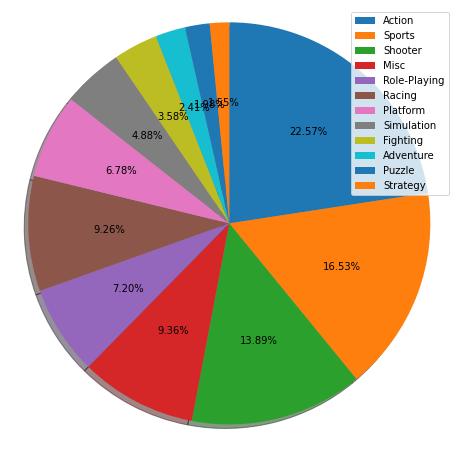

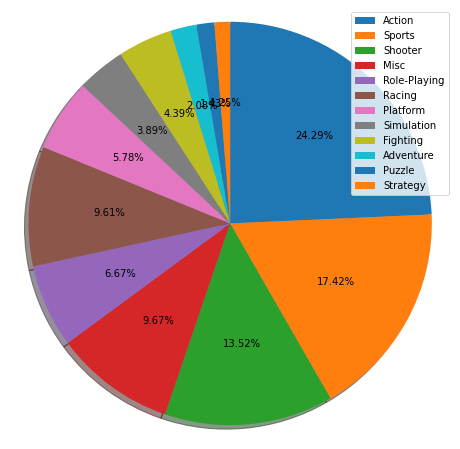

In [133]:
#파이차트를 통한 지역별 판매량이 높은 게임 (선호장르)


labels = game_group2_df['Genre']
explodes = [0.1, 0, 0]

def pie_chart(feature): 
  fig = plt.figure(figsize=(8,8))
  fig.set_facecolor('white')
  ax = fig.add_subplot()

  pie = ax.pie(feature, 
             startangle=90, # 시작점 90도
             counterclock=False, # 시계 방향
             autopct=lambda p : '{:.2f}%'.format(p),
             shadow=True
            )
  plt.axis('equal')
  plt.legend(labels)
  plt.show()

pie_chart(game_group2_df['JP_Sales'])
pie_chart(game_group2_df['NA_Sales'])
pie_chart(game_group2_df['EU_Sales'])
pie_chart(game_group2_df['Other_Sales'])


In [134]:
game_df1 = df.loc[:,['Year','Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales','all_Sales']]

game_group1_df = game_df1.groupby(['Year','Genre']).sum().sort_values(by='Year',ascending= False).reset_index()

In [135]:
Year_00_03 = game_group1_df[(game_group1_df['Year'] < 2004)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

Year_04_07 = game_group1_df[(game_group1_df['Year'] > 2003)&(game_group1_df['Year'] < 2008)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

Year_08_11 = game_group1_df[(game_group1_df['Year'] > 2007)&(game_group1_df['Year'] < 20012)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

Year_12_15 = game_group1_df[(game_group1_df['Year'] > 2011)&(game_group1_df['Year'] < 2016)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

Year_16 = game_group1_df[(game_group1_df['Year'] > 2015)&(game_group1_df['Year'] < 2020)].groupby(['Year','Genre']).sum().sort_values(by='Genre',ascending= True).reset_index()

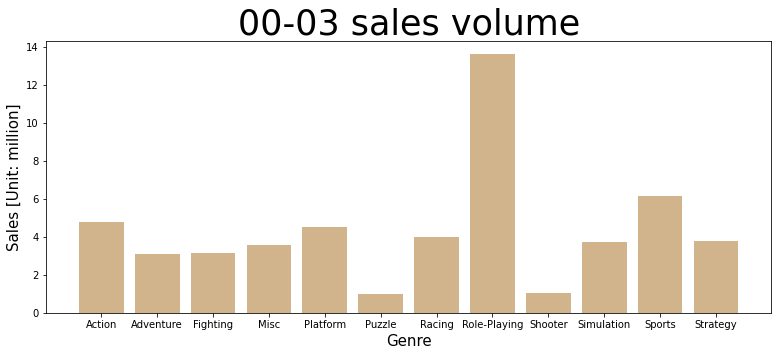

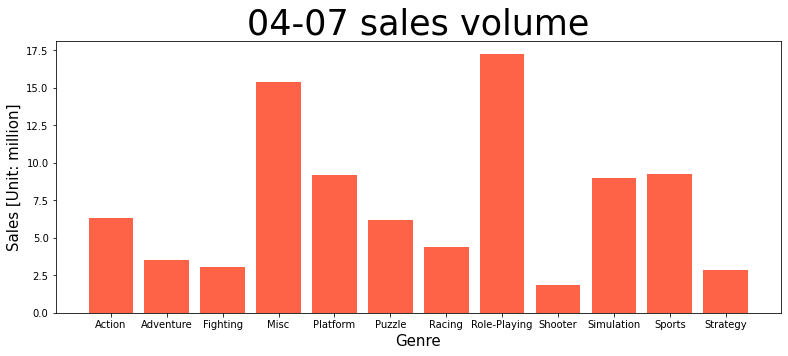

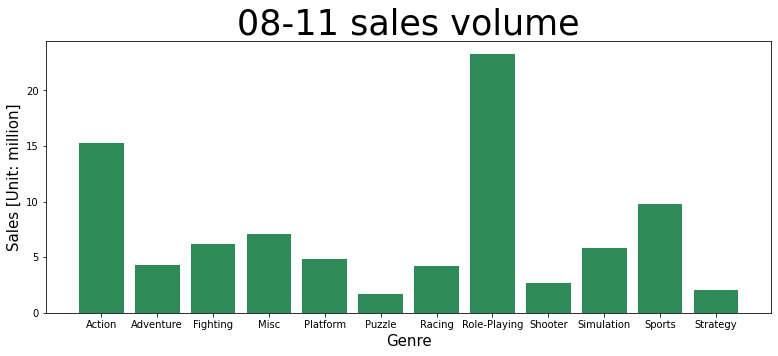

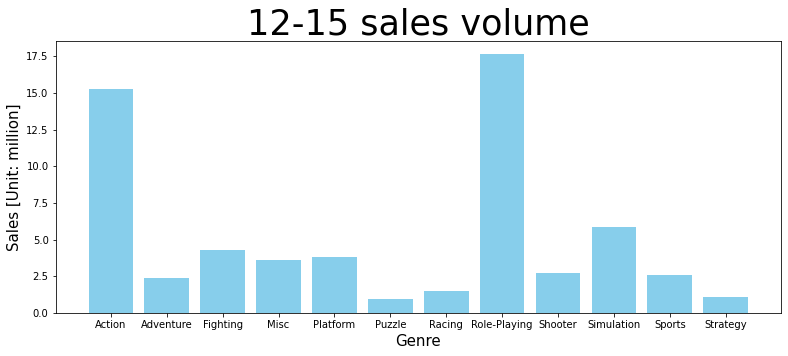

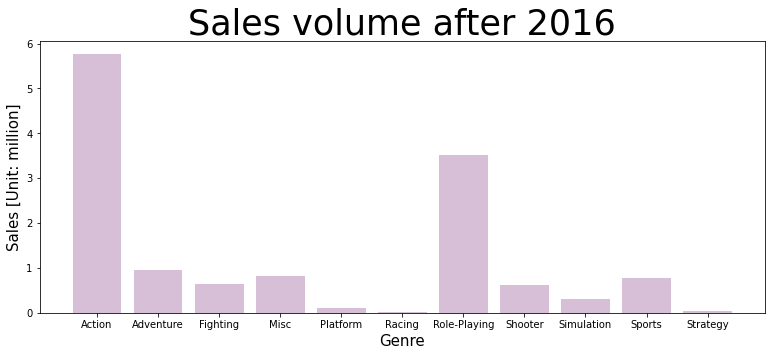

In [136]:
parameters = {'axes.titlesize': 35,
              'axes.labelsize': 15
              }
plt.rcParams.update(parameters)

#2000~2003년 지역별 판매량
def Year00_03(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'tan'})

  plt.title('00-03 sales volume')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

#2004~2007년 지역별 판매량
def Year04_07(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'tomato'})

  plt.title('04-07 sales volume')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

#2008~2011년 지역별 판매량
def Year08_11(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'seagreen'})

  plt.title('08-11 sales volume')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

#2012~2015년 지역별 판매량
def Year12_15(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'skyblue'})

  plt.title('12-15 sales volume')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

#2016년 이후 지역별 판매량
def Year16_(Genre,nation):
  fig = plt.figure(figsize=(13,5))

  plt.bar(Genre,
          nation,
          color={'thistle'})

  plt.title('Sales volume after 2016')
  plt.xlabel('Genre')
  plt.ylabel('Sales [Unit: million]')
  plt.show()

Year00_03(Year_00_03['Genre'],Year_00_03['JP_Sales'])
#2000~2003년 일본 지역 판매량
Year04_07(Year_04_07['Genre'],Year_04_07['JP_Sales'])
#2004~2007년 일본 지역 판매량
Year08_11(Year_08_11['Genre'],Year_08_11['JP_Sales'])
#2008~2011년 일본 지역 판매량
Year12_15(Year_12_15['Genre'],Year_12_15['JP_Sales'])
#2012~2015년 일본 지역 판매량
Year16_(Year_16['Genre'],Year_16['JP_Sales'])
#2016년 이후 일본 지역 판매량

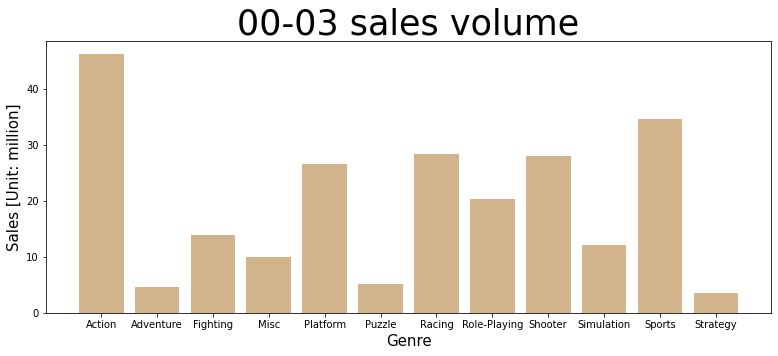

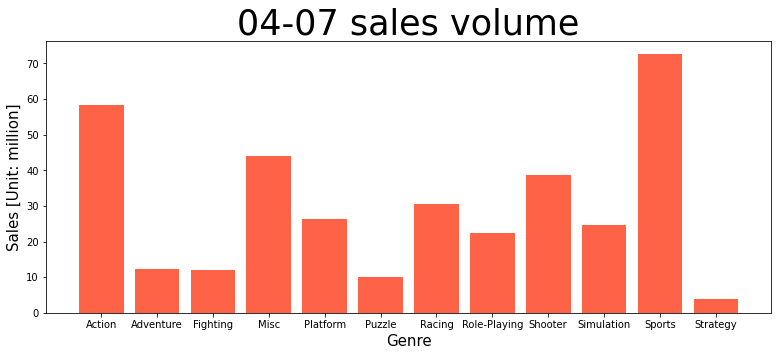

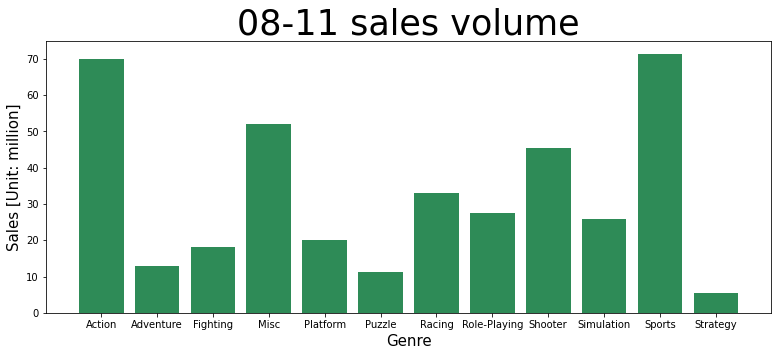

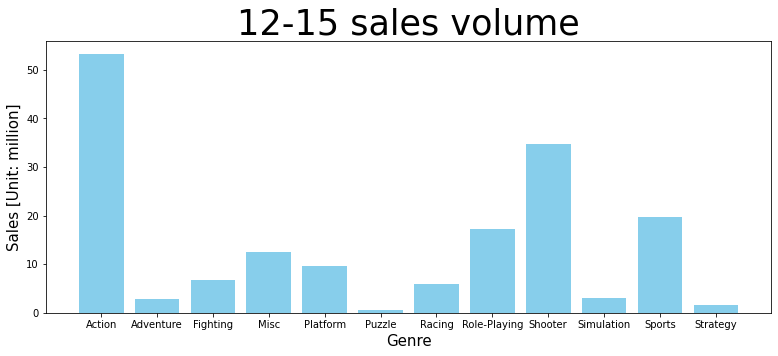

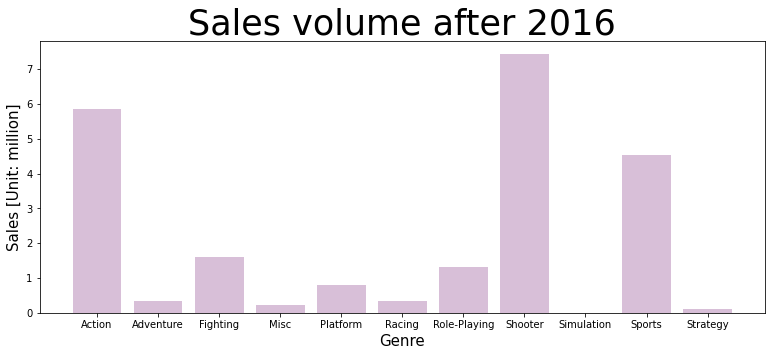

In [137]:
Year00_03(Year_00_03['Genre'],Year_00_03['NA_Sales'])
#2000~2003년 북미 지역 판매량
Year04_07(Year_04_07['Genre'],Year_04_07['NA_Sales'])
#2004~2007년 북미 지역 판매량
Year08_11(Year_08_11['Genre'],Year_08_11['NA_Sales'])
#2008~2011년 북미 지역 판매량
Year12_15(Year_12_15['Genre'],Year_12_15['NA_Sales'])
#2012~2015년 북미 지역 판매량
Year16_(Year_16['Genre'],Year_16['NA_Sales'])
#2016년 이후 북미 지역 판매량

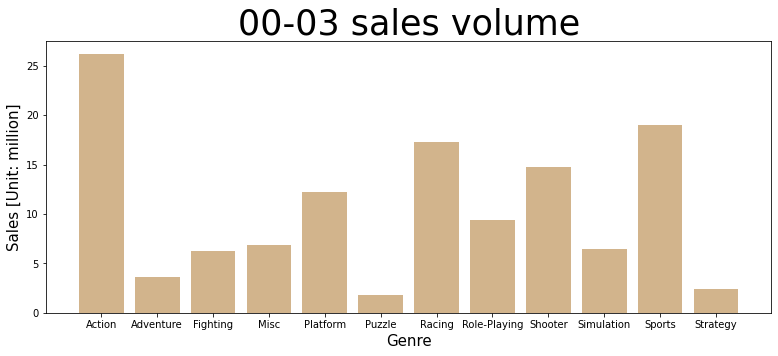

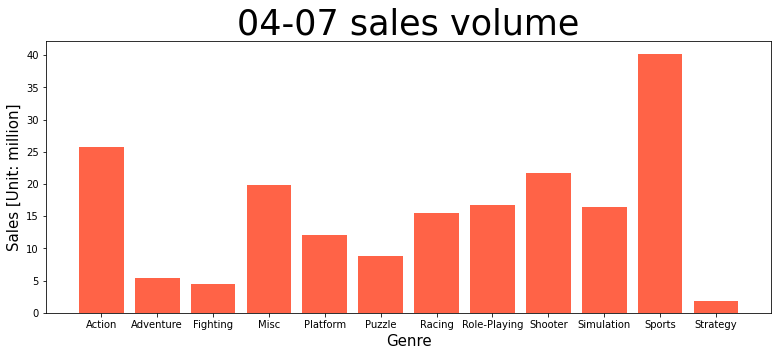

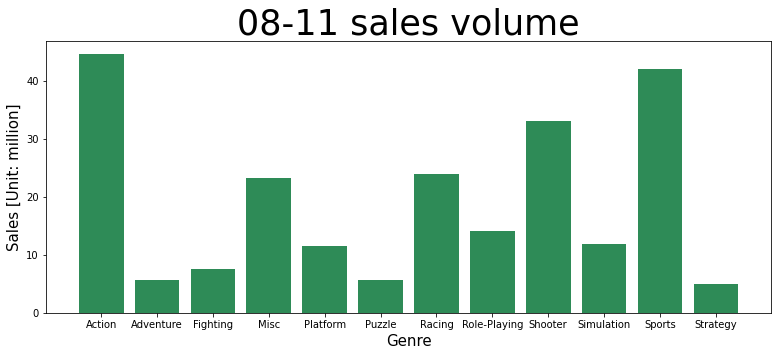

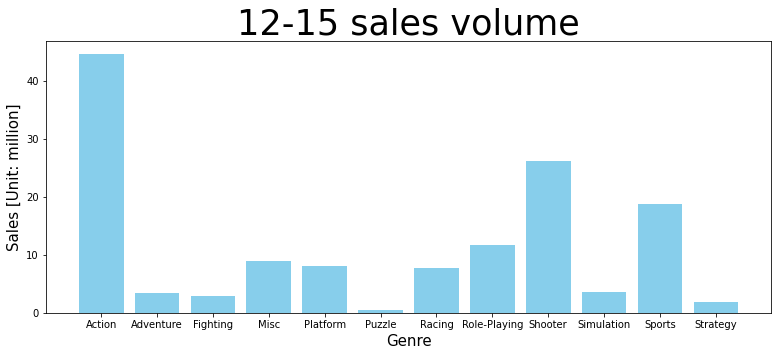

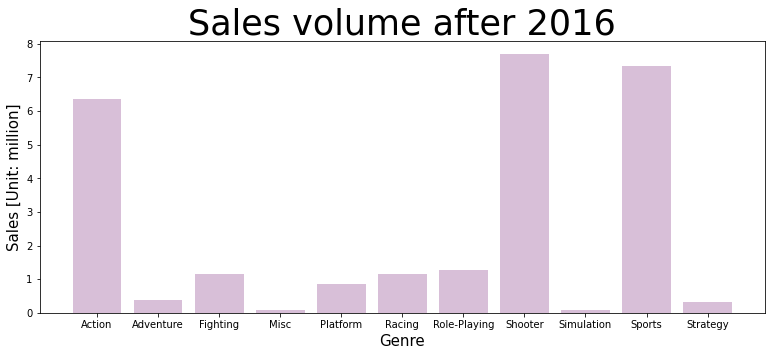

In [138]:
Year00_03(Year_00_03['Genre'],Year_00_03['EU_Sales'])
#2000~2003년 유럽 지역 판매량
Year04_07(Year_04_07['Genre'],Year_04_07['EU_Sales'])
#2004~2007년 유럽 지역 판매량
Year08_11(Year_08_11['Genre'],Year_08_11['EU_Sales'])
#2008~2011년 유럽 지역 판매량
Year12_15(Year_12_15['Genre'],Year_12_15['EU_Sales'])
#2012~2015년 유럽 지역 판매량
Year16_(Year_16['Genre'],Year_16['EU_Sales'])
#2016년 이후 유럽 지역 판매량

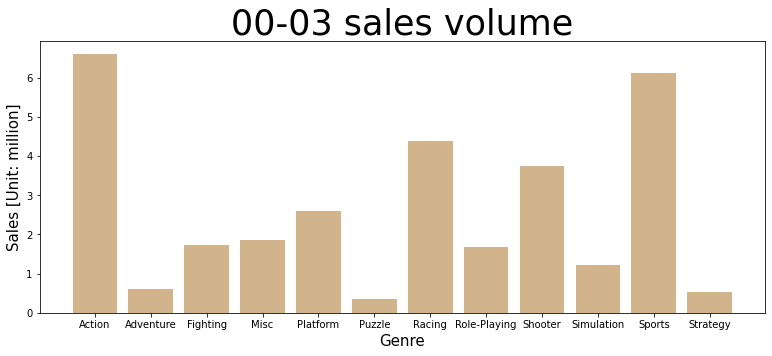

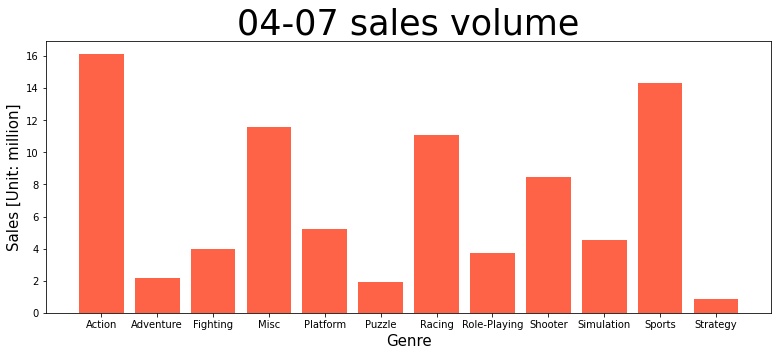

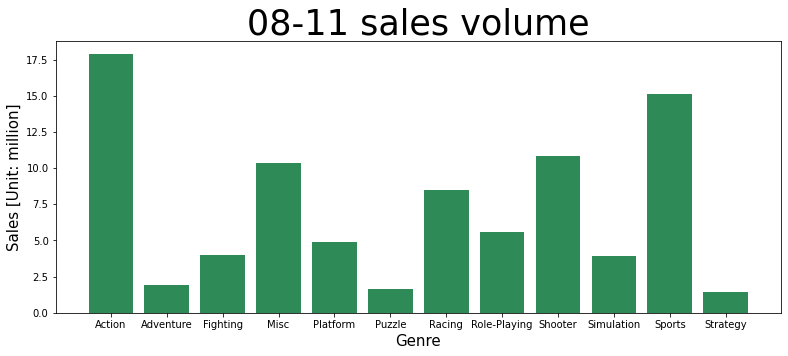

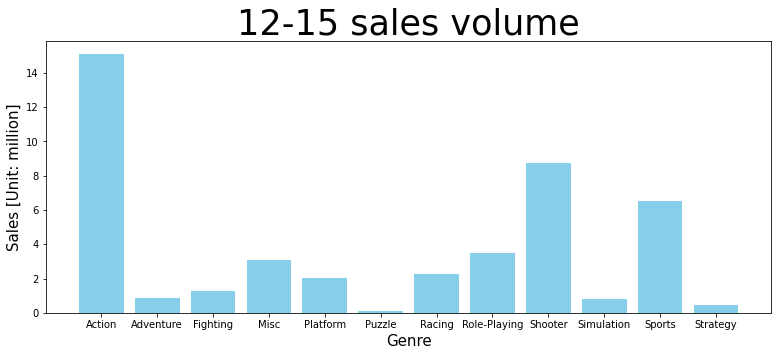

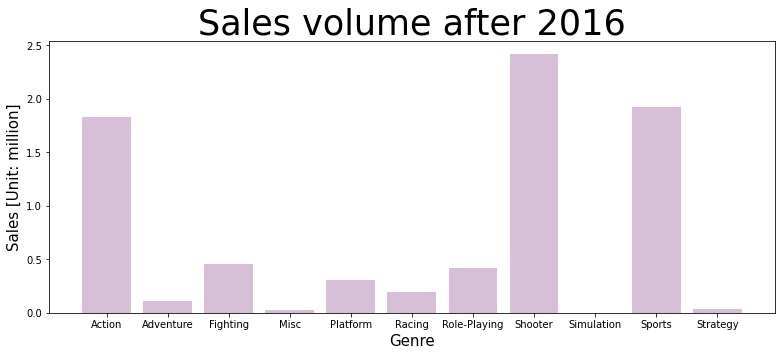

In [139]:
Year00_03(Year_00_03['Genre'],Year_00_03['Other_Sales'])
#2000~2003년 기타 지역 판매량
Year04_07(Year_04_07['Genre'],Year_04_07['Other_Sales'])
#2004~2007년 기타 지역 판매량
Year08_11(Year_08_11['Genre'],Year_08_11['Other_Sales'])
#2008~2011년 기타 지역 판매량
Year12_15(Year_12_15['Genre'],Year_12_15['Other_Sales'])
#2012~2015년 기타 지역 판매량
Year16_(Year_16['Genre'],Year_16['Other_Sales'])
#2016년 이후 기타 지역 판매량

In [144]:
Y_by_Gen = pd.get_dummies(df.drop(columns=['Platform','all_Sales','NA_Sales','EU_Sales','JP_Sales','Other_Sales'])).groupby(['Year']).sum().reset_index()
Y_by_Gen

,Year,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,2000,43.0,16.0,28.0,19.0,24.0,12.0,42.0,27.0,20.0,15.0,79.0,16.0
1,2001,63.0,20.0,18.0,25.0,40.0,15.0,68.0,41.0,36.0,27.0,95.0,20.0
2,2002,121.0,40.0,54.0,44.0,75.0,20.0,103.0,54.0,78.0,19.0,183.0,20.0
3,2003,142.0,12.0,44.0,52.0,83.0,7.0,107.0,45.0,69.0,35.0,123.0,36.0
4,2004,120.0,38.0,38.0,67.0,65.0,24.0,69.0,59.0,87.0,26.0,99.0,32.0
5,2005,190.0,40.0,43.0,108.0,79.0,32.0,75.0,70.0,95.0,38.0,119.0,28.0
6,2006,178.0,70.0,54.0,104.0,54.0,41.0,74.0,104.0,68.0,57.0,135.0,42.0
7,2007,207.0,81.0,48.0,145.0,39.0,65.0,81.0,101.0,82.0,85.0,161.0,64.0
8,2008,216.0,164.0,57.0,205.0,61.0,64.0,79.0,110.0,81.0,113.0,197.0,49.0
9,2009,264.0,139.0,52.0,201.0,27.0,76.0,81.0,100.0,88.0,118.0,182.0,63.0


In [148]:
y16 = Y_by_Gen[Y_by_Gen['Year']==2016].reset_index()
y16

,index,Year,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy
0,16,2016,117.0,32.0,14.0,18.0,10.0,0.0,20.0,38.0,32.0,9.0,36.0,10.0


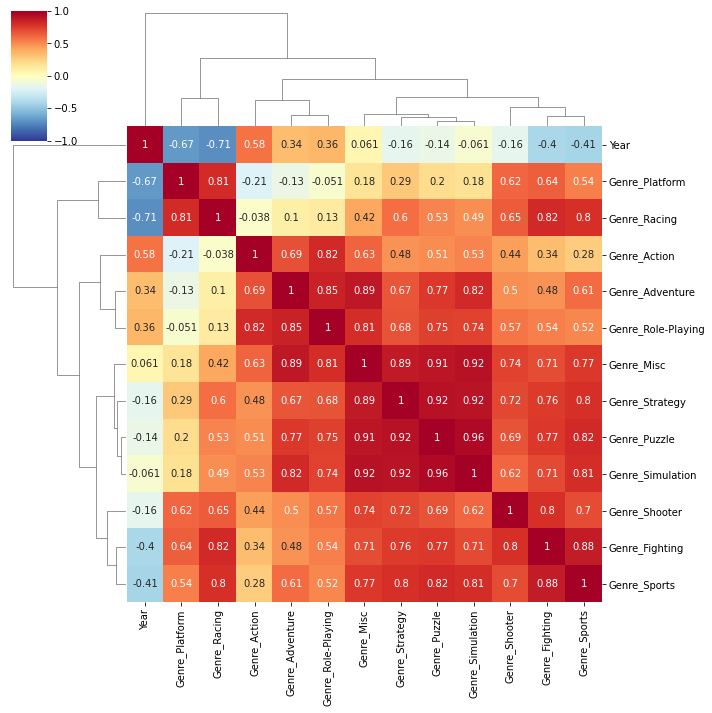

In [140]:


y_corr = Y_by_Gen.corr()

sns.clustermap(y_corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # 색상으로 표시
               vmin = -1, vmax = 1, # 범위 표시
              )
#연도와 게임 출시의 상관관계 시각화

In [141]:
gen_all = df.groupby(['Genre']).sum()
gen_all = gen_all.drop(columns=['Year','all_Sales'])
gen_all.corr()
#지역별 판매량 관계가 있는가?

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.993556,0.367184,0.989669
EU_Sales,0.993556,1.000000,0.333082,0.996232
JP_Sales,0.367184,0.333082,1.000000,0.327264
Other_Sales,0.989669,0.996232,0.327264,1.000000


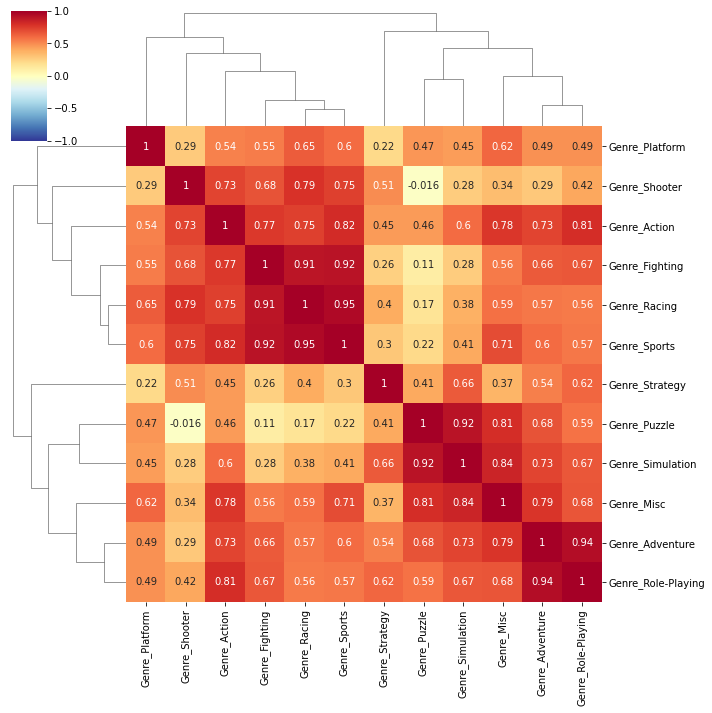

In [142]:
Genre = pd.get_dummies(df.drop(columns=['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','all_Sales','Year']))
Sales = df.drop(columns=['Year','Genre'])

game = Sales.join(Genre)
game = game.groupby(['Platform']).sum()

Platform_by_Genre = game.drop(columns=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','all_Sales'])

Platform_by_Genre
#플랫폼별 게임 출하량

corr = Platform_by_Genre.corr()
#장르별로 서로 상관관계가 있는가?
corr

sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )
#장르별 상관관계 시각화

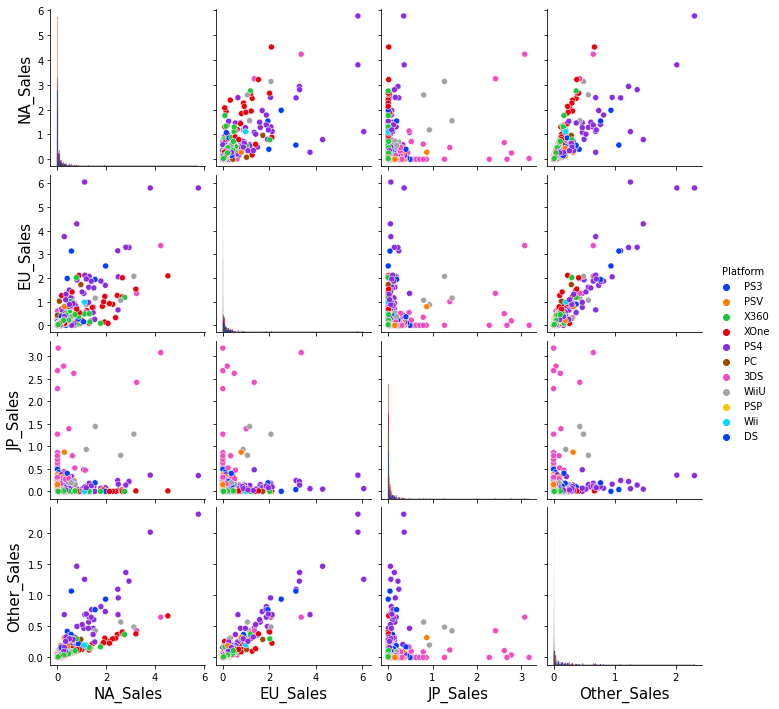

In [143]:
game_df3 = df[df['Year'] >= 2014]

Platform = game_df3.loc[:,['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

sns.pairplot(Platform,
             diag_kind='hist',
             hue='Platform',
             palette='bright')
plt.show()
#지역 - 플랫폼 출하